In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import minmax_scale

from sklearn.metrics import confusion_matrix

# Classification of MNIST Dataset.

First I will load the dataset from keras datasets.

In [49]:
mnist = mnist.load_data()

In [50]:
print(len(mnist[0][0]))
print(len(mnist[1][0]))

60000
10000


We can see that the dataset contain $60000$ examples for training and $10000$ for testing the trained model. I will separate features from labels.

In [51]:
(train_x, train_y), (test_x, test_y) = mnist

In [52]:
print('X_train: ', str(train_x.shape))
print('Y_train: ', str(train_y.shape))
print('X_test:  ', str(test_x.shape))
print('Y_test:  ', str(test_y.shape))

X_train:  (60000, 28, 28)
Y_train:  (60000,)
X_test:   (10000, 28, 28)
Y_test:   (10000,)


I saw that data for training are with shape $28x28$ so I will flatten them to be more comfortable for work with.

In [53]:
train_x = train_x.reshape(train_x.shape[0], -1)
test_x = test_x.reshape(test_x.shape[0], -1)

In [54]:
print('X_train: ', str(train_x.shape))
print('Y_train: ', str(train_y.shape))
print('X_test:  ', str(test_x.shape))
print('Y_test:  ', str(test_y.shape))

X_train:  (60000, 784)
Y_train:  (60000,)
X_test:   (10000, 784)
Y_test:   (10000,)


Also very important part of preprocessing the data for training the model are to scale them. Now as it is shown below the values are in the range from $0$ to $255$. I have to scale them in the range from $0$ to $1$.

In [55]:
print(train_x.max(axis=1))
print("---------------------------------")
print(train_x.min(axis=1))

[255 255 255 ... 255 255 255]
---------------------------------
[0 0 0 ... 0 0 0]


In [56]:
train_x = pd.DataFrame(minmax_scale(train_x))
test_x = pd.DataFrame(minmax_scale(test_x))

In [57]:
print(train_x.max(axis=1))
print("---------------------------------")
print(train_x.min(axis=1))

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
59995    1.0
59996    1.0
59997    1.0
59998    1.0
59999    1.0
Length: 60000, dtype: float64
---------------------------------
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
59995    0.0
59996    0.0
59997    0.0
59998    0.0
59999    0.0
Length: 60000, dtype: float64


Now we are ready with preprocessing of the data which will be used for training and testing the model. Firstly I will define the model and sets of hyperparameters.

In [58]:
model = KNeighborsClassifier()

In [59]:
param_grid = [{"n_neighbors": [1, 2, 3, 5, 7, 10], "leaf_size": [10, 30, 50, 100], }]

I will use $GridSearchCV$ to train the model with different values for the hyperparameter and will use the model with the best performance.

In [60]:
grid_search = GridSearchCV(model, param_grid, scoring="accuracy", cv=5)

In [61]:
grid_search.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'leaf_size': [10, 30, 50, 100],
                          'n_neighbors': [1, 2, 3, 5, 7, 10]}],
             scoring='accuracy')

In [62]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9693833333333334 {'leaf_size': 10, 'n_neighbors': 1}
0.96315 {'leaf_size': 10, 'n_neighbors': 2}
0.9700833333333334 {'leaf_size': 10, 'n_neighbors': 3}
0.9692166666666667 {'leaf_size': 10, 'n_neighbors': 5}
0.9677666666666667 {'leaf_size': 10, 'n_neighbors': 7}
0.9648666666666668 {'leaf_size': 10, 'n_neighbors': 10}
0.9693833333333334 {'leaf_size': 30, 'n_neighbors': 1}
0.96315 {'leaf_size': 30, 'n_neighbors': 2}
0.9700833333333334 {'leaf_size': 30, 'n_neighbors': 3}
0.9692166666666667 {'leaf_size': 30, 'n_neighbors': 5}
0.9677666666666667 {'leaf_size': 30, 'n_neighbors': 7}
0.9648666666666668 {'leaf_size': 30, 'n_neighbors': 10}
0.9693833333333334 {'leaf_size': 50, 'n_neighbors': 1}
0.96315 {'leaf_size': 50, 'n_neighbors': 2}
0.9700833333333334 {'leaf_size': 50, 'n_neighbors': 3}
0.9692166666666667 {'leaf_size': 50, 'n_neighbors': 5}
0.9677666666666667 {'leaf_size': 50, 'n_neighbors': 7}
0.9648666666666668 {'leaf_size': 50, 'n_neighbors': 10}
0.9693833333333334 {'leaf_size': 100, 'n

In [63]:
grid_search.best_estimator_

KNeighborsClassifier(leaf_size=10, n_neighbors=3)

In [64]:
best_model = grid_search.best_estimator_

In [65]:
grid_search.best_score_

0.9700833333333334

To analyze the results from the model I will use confusion matrix.

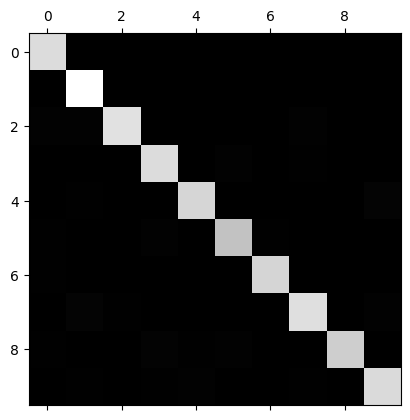

In [66]:
conf_mx = confusion_matrix(test_y, best_model.predict(test_x))

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

Confusion matrix is good tool for analyzing the mistakes of the model but I will relace the values on diagonal with $0$. In this way it will be easier to analyze the mistakes.

In [67]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
conf_mx = conf_mx / row_sums

np.fill_diagonal(conf_mx, 0)

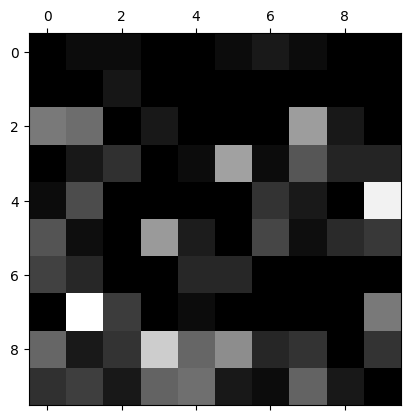

In [68]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

I will also show all the cases in which the model return wrong prediction.

True value :  4
Predicted value :  9


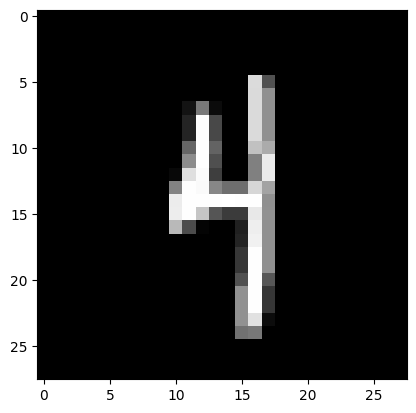

----------------------------------------------------------------
True value :  4
Predicted value :  9


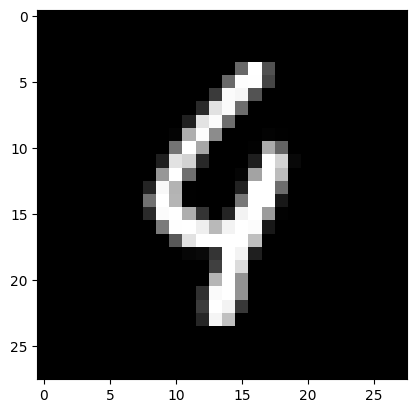

----------------------------------------------------------------
True value :  3
Predicted value :  5


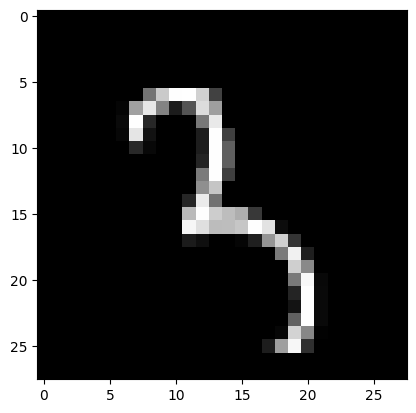

----------------------------------------------------------------
True value :  9
Predicted value :  8


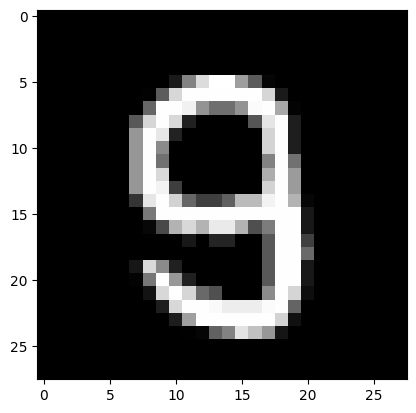

----------------------------------------------------------------
True value :  4
Predicted value :  6


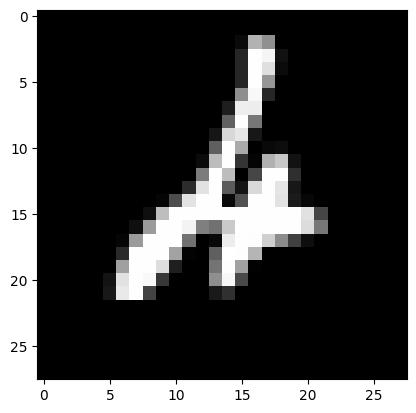

----------------------------------------------------------------
True value :  4
Predicted value :  1


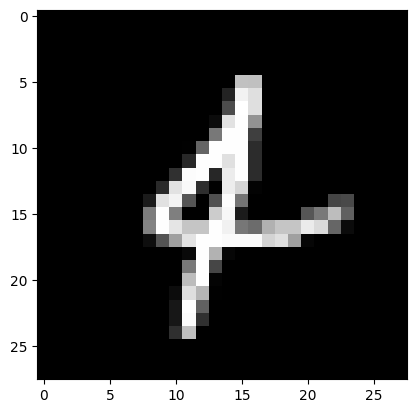

----------------------------------------------------------------
True value :  2
Predicted value :  0


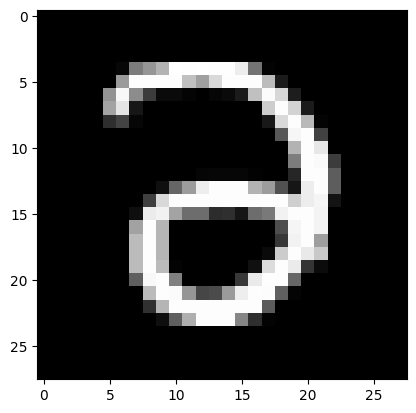

----------------------------------------------------------------
True value :  9
Predicted value :  7


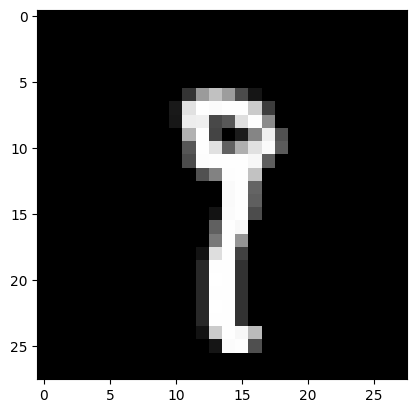

----------------------------------------------------------------
True value :  2
Predicted value :  7


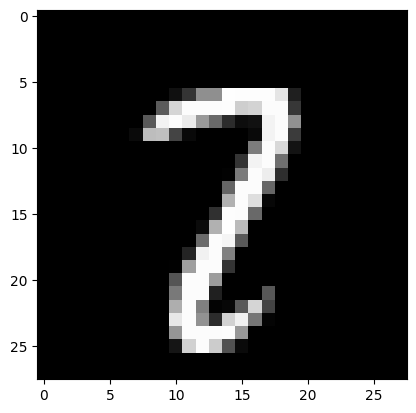

----------------------------------------------------------------
True value :  6
Predicted value :  4


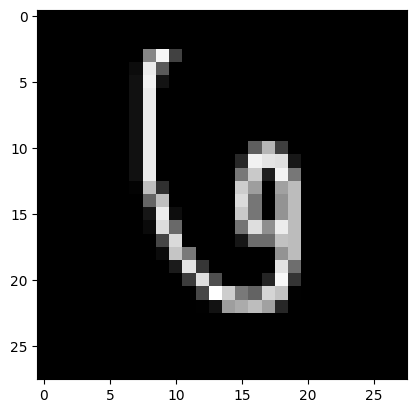

----------------------------------------------------------------
True value :  7
Predicted value :  4


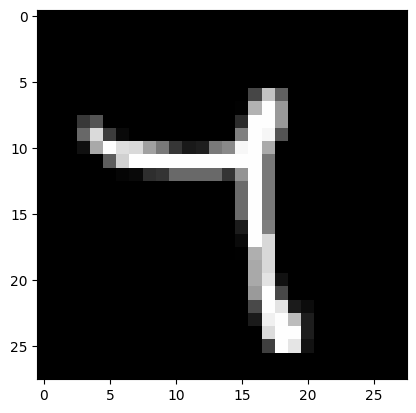

----------------------------------------------------------------
True value :  3
Predicted value :  7


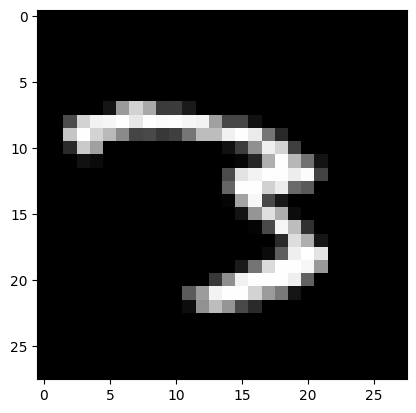

----------------------------------------------------------------
True value :  5
Predicted value :  3


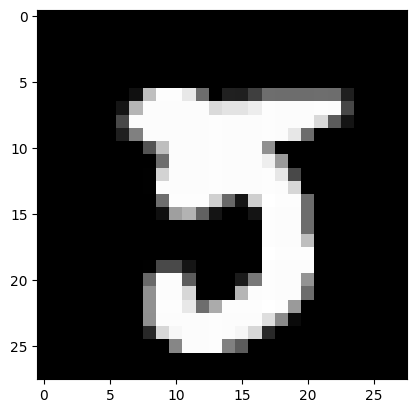

----------------------------------------------------------------
True value :  6
Predicted value :  0


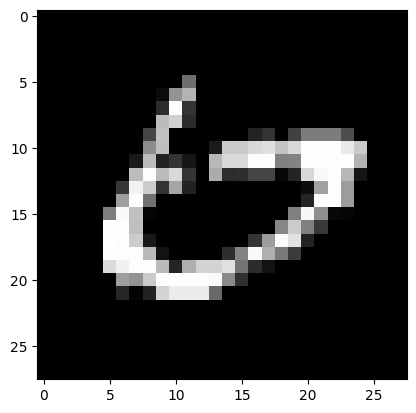

----------------------------------------------------------------
True value :  3
Predicted value :  7


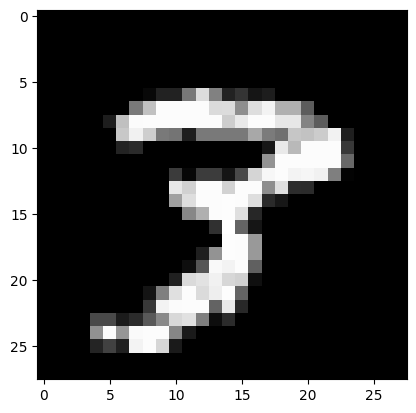

----------------------------------------------------------------
True value :  9
Predicted value :  3


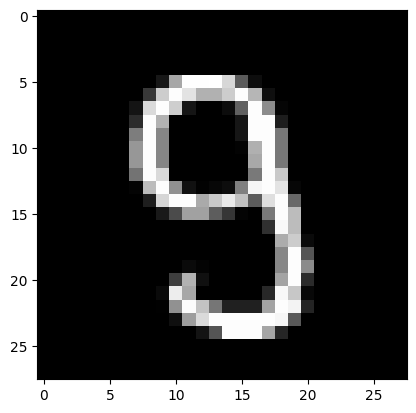

----------------------------------------------------------------
True value :  8
Predicted value :  0


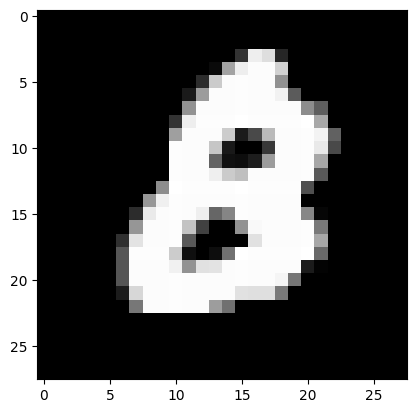

----------------------------------------------------------------
True value :  8
Predicted value :  1


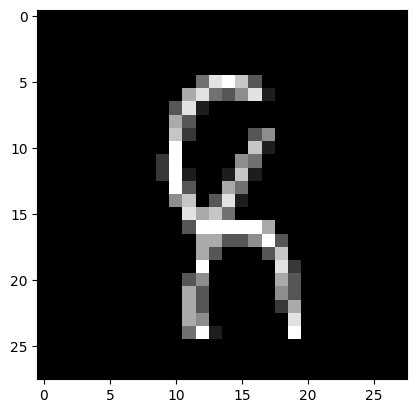

----------------------------------------------------------------
True value :  7
Predicted value :  1


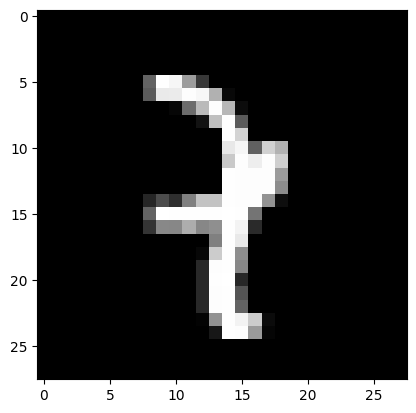

----------------------------------------------------------------
True value :  8
Predicted value :  3


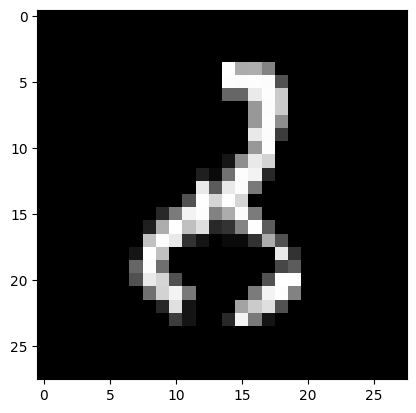

----------------------------------------------------------------
True value :  2
Predicted value :  7


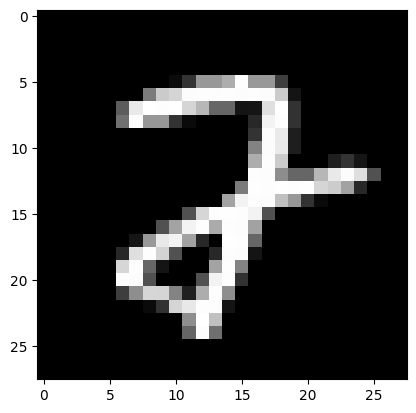

----------------------------------------------------------------
True value :  8
Predicted value :  3


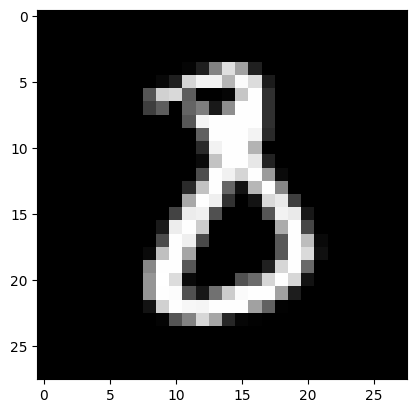

----------------------------------------------------------------
True value :  3
Predicted value :  9


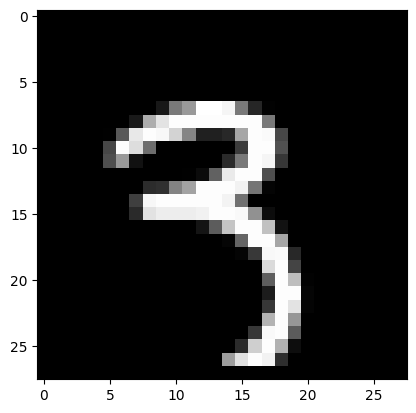

----------------------------------------------------------------
True value :  2
Predicted value :  1


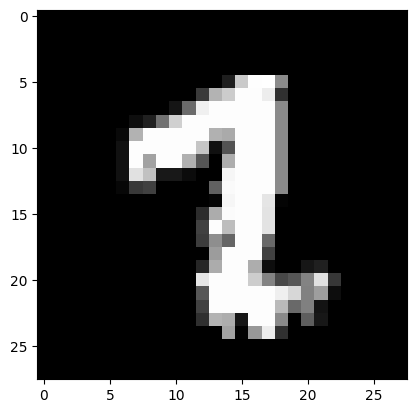

----------------------------------------------------------------
True value :  8
Predicted value :  4


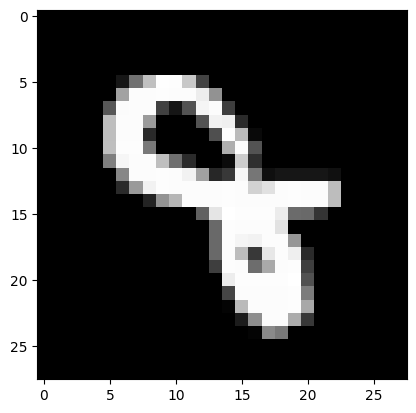

----------------------------------------------------------------
True value :  4
Predicted value :  9


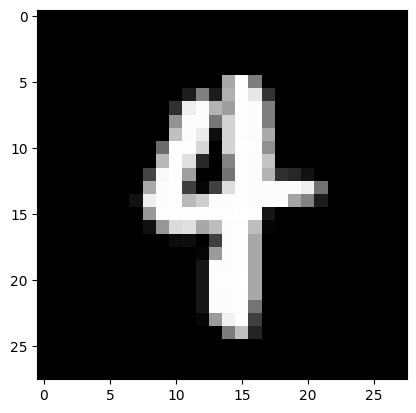

----------------------------------------------------------------
True value :  0
Predicted value :  6


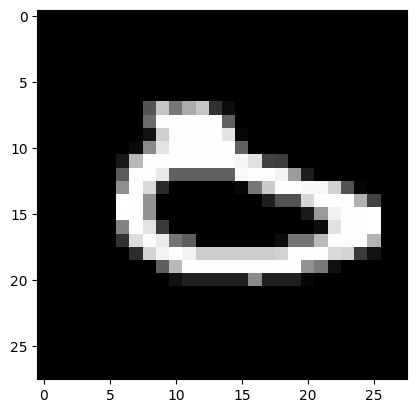

----------------------------------------------------------------
True value :  4
Predicted value :  9


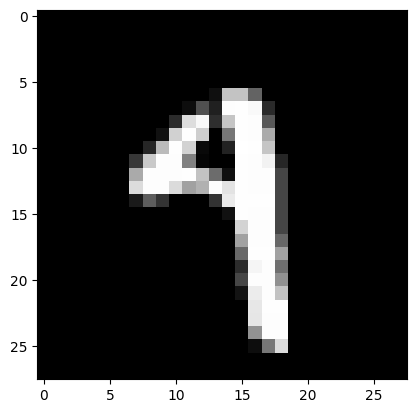

----------------------------------------------------------------
True value :  5
Predicted value :  9


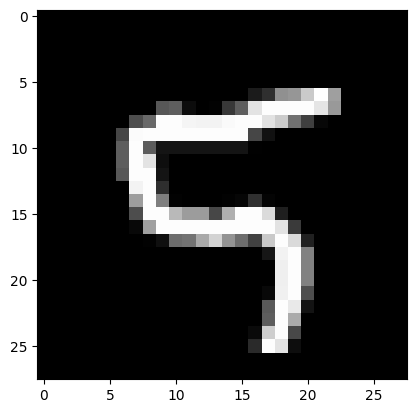

----------------------------------------------------------------
True value :  8
Predicted value :  3


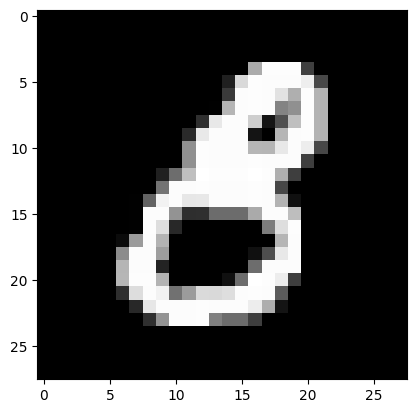

----------------------------------------------------------------
True value :  8
Predicted value :  3


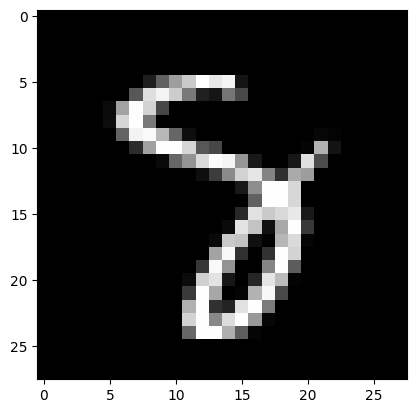

----------------------------------------------------------------
True value :  4
Predicted value :  9


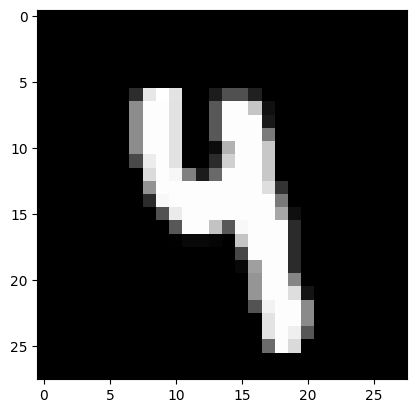

----------------------------------------------------------------
True value :  2
Predicted value :  7


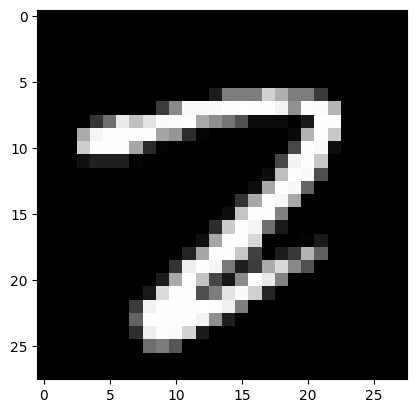

----------------------------------------------------------------
True value :  3
Predicted value :  5


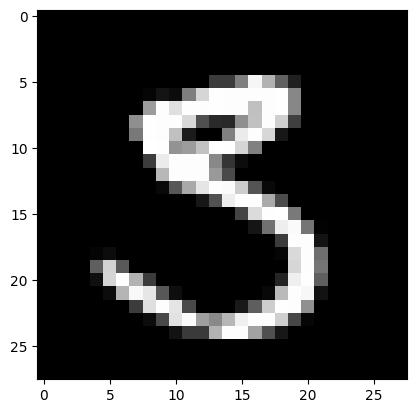

----------------------------------------------------------------
True value :  2
Predicted value :  0


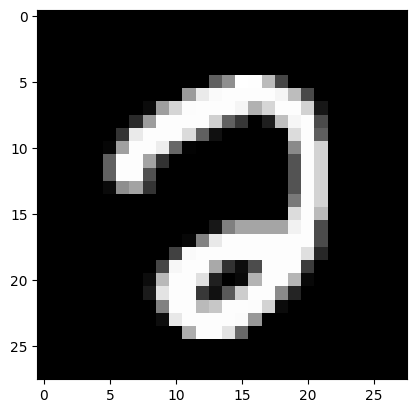

----------------------------------------------------------------
True value :  8
Predicted value :  9


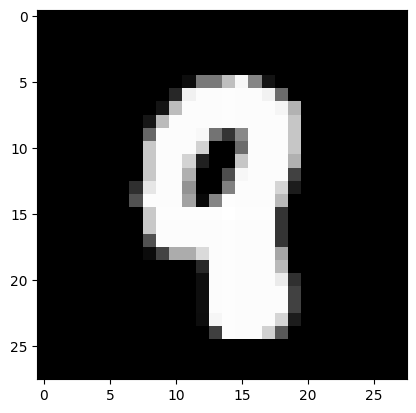

----------------------------------------------------------------
True value :  5
Predicted value :  4


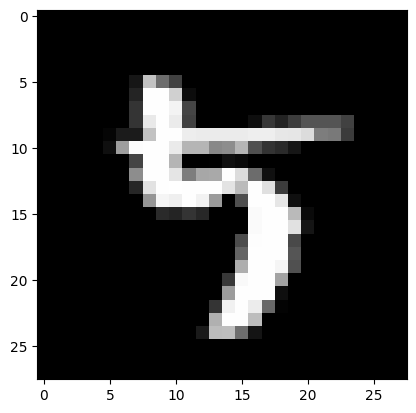

----------------------------------------------------------------
True value :  3
Predicted value :  5


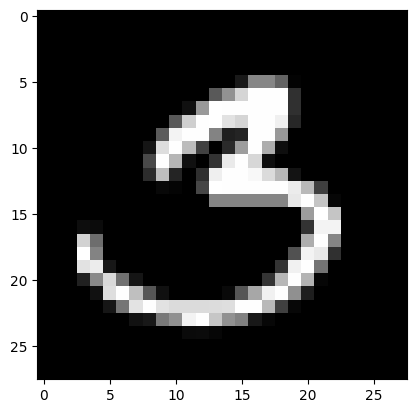

----------------------------------------------------------------
True value :  6
Predicted value :  5


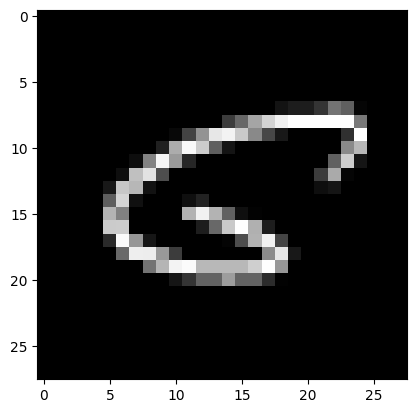

----------------------------------------------------------------
True value :  7
Predicted value :  1


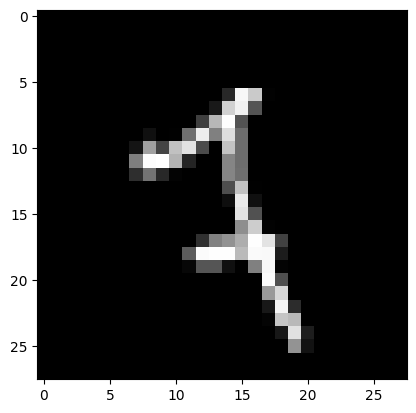

----------------------------------------------------------------
True value :  3
Predicted value :  9


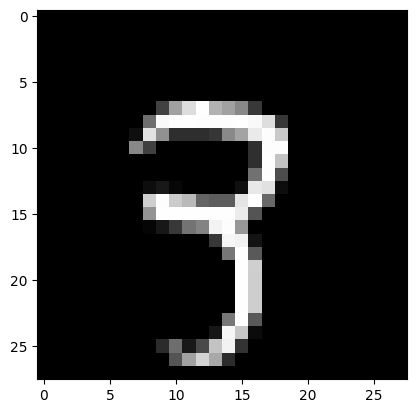

----------------------------------------------------------------
True value :  8
Predicted value :  4


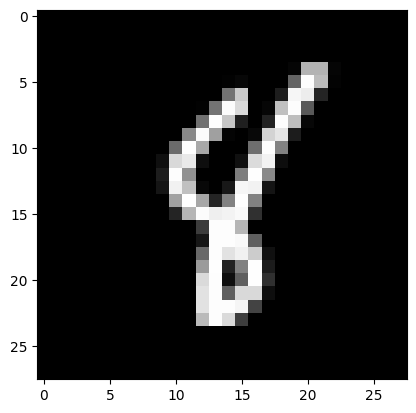

----------------------------------------------------------------
True value :  5
Predicted value :  3


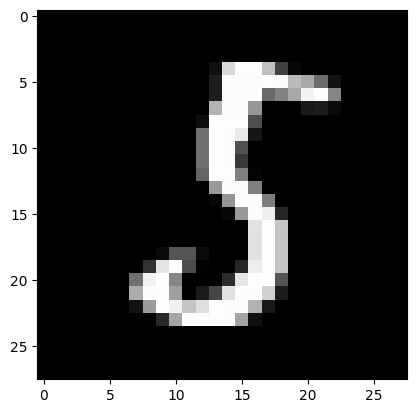

----------------------------------------------------------------
True value :  5
Predicted value :  6


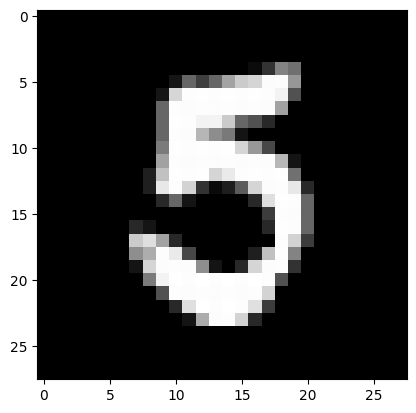

----------------------------------------------------------------
True value :  9
Predicted value :  8


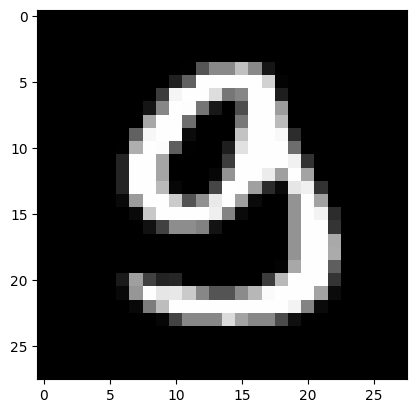

----------------------------------------------------------------
True value :  4
Predicted value :  6


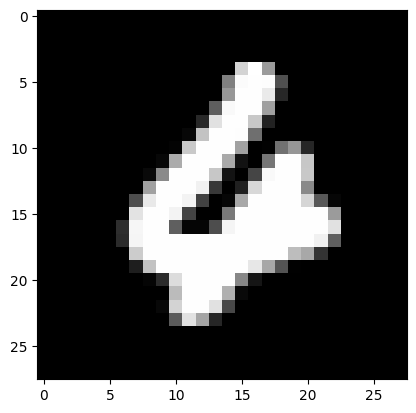

----------------------------------------------------------------
True value :  2
Predicted value :  1


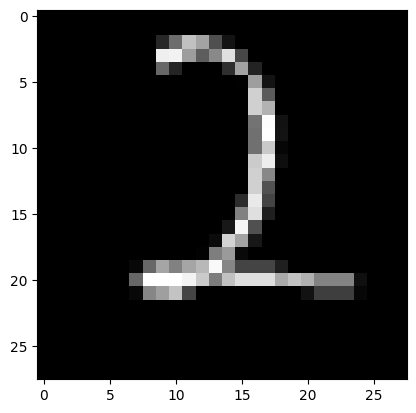

----------------------------------------------------------------
True value :  9
Predicted value :  4


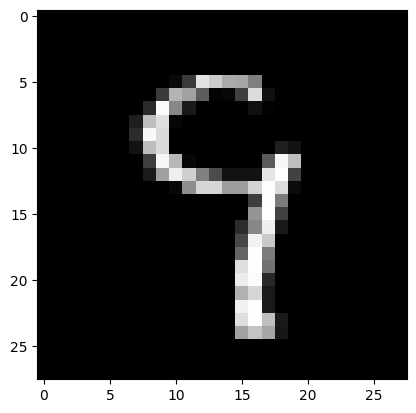

----------------------------------------------------------------
True value :  7
Predicted value :  2


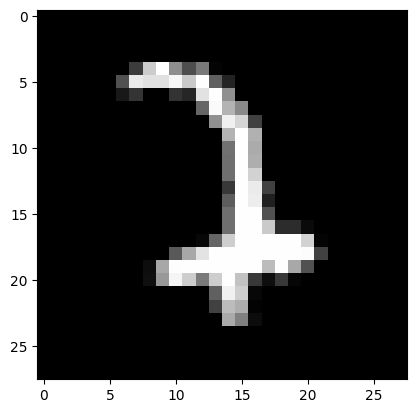

----------------------------------------------------------------
True value :  9
Predicted value :  4


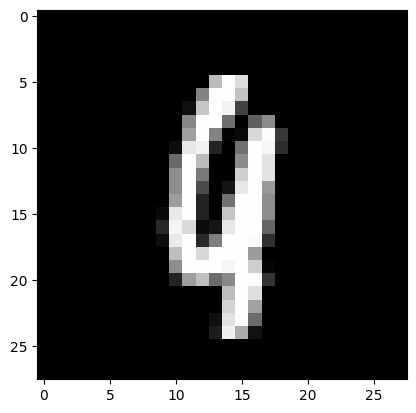

----------------------------------------------------------------
True value :  4
Predicted value :  9


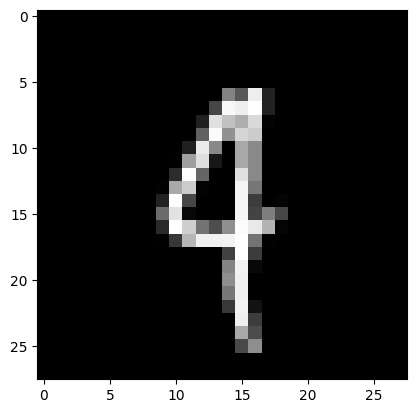

----------------------------------------------------------------
True value :  9
Predicted value :  5


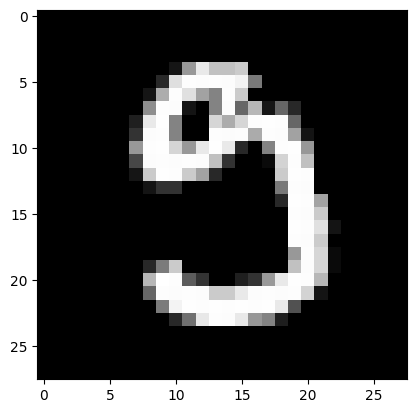

----------------------------------------------------------------
True value :  7
Predicted value :  1


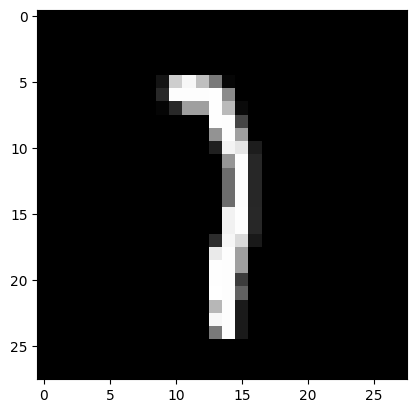

----------------------------------------------------------------
True value :  5
Predicted value :  7


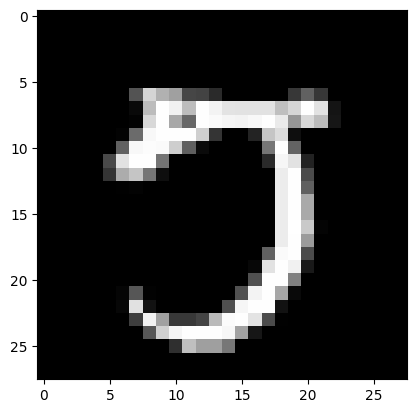

----------------------------------------------------------------
True value :  8
Predicted value :  3


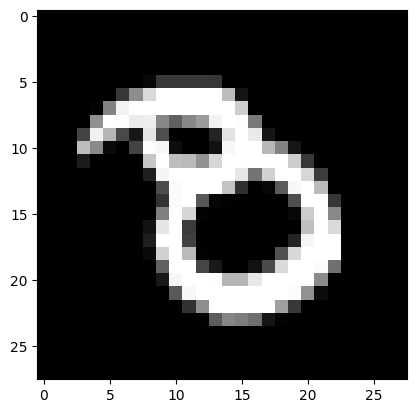

----------------------------------------------------------------
True value :  8
Predicted value :  5


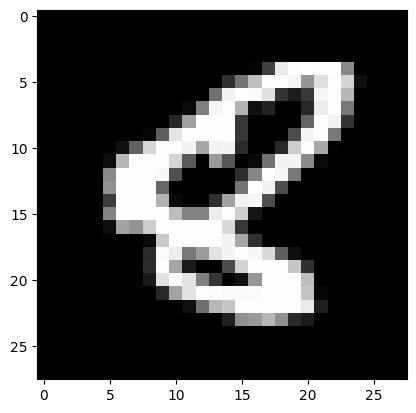

----------------------------------------------------------------
True value :  7
Predicted value :  1


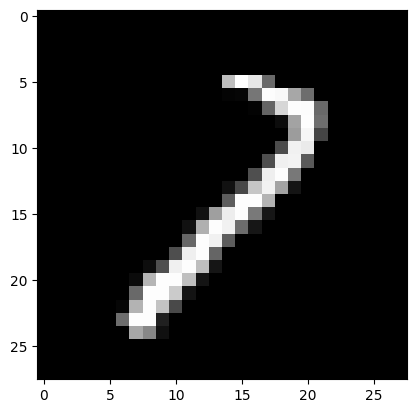

----------------------------------------------------------------
True value :  8
Predicted value :  0


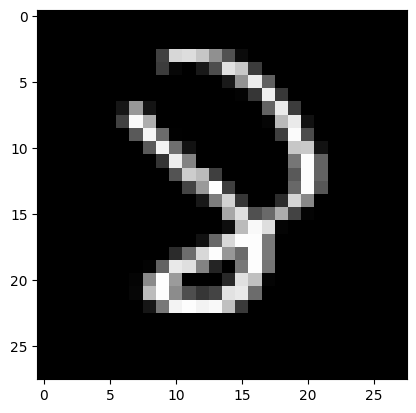

----------------------------------------------------------------
True value :  5
Predicted value :  3


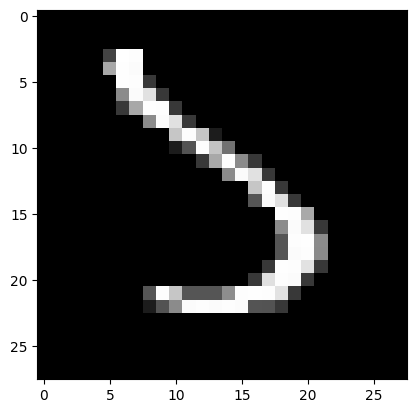

----------------------------------------------------------------
True value :  8
Predicted value :  2


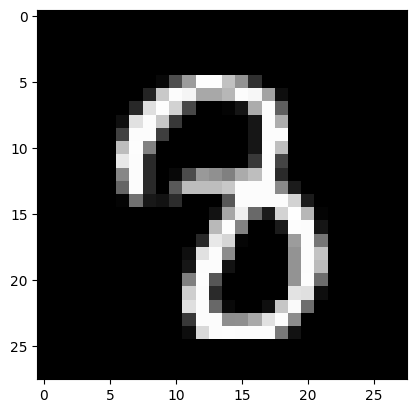

----------------------------------------------------------------
True value :  4
Predicted value :  9


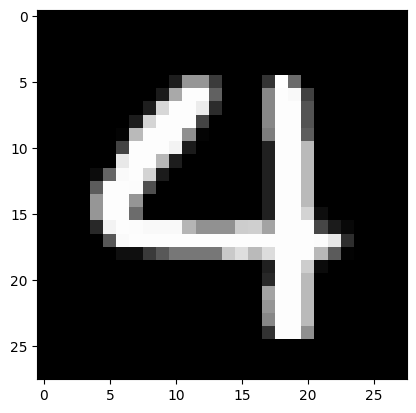

----------------------------------------------------------------
True value :  8
Predicted value :  4


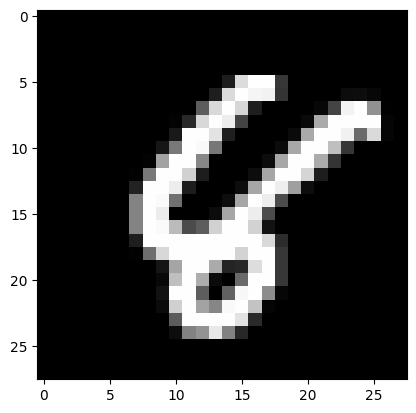

----------------------------------------------------------------
True value :  4
Predicted value :  1


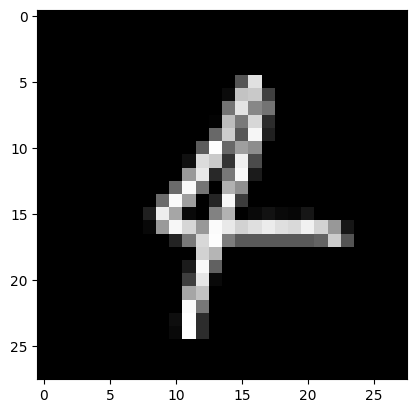

----------------------------------------------------------------
True value :  7
Predicted value :  1


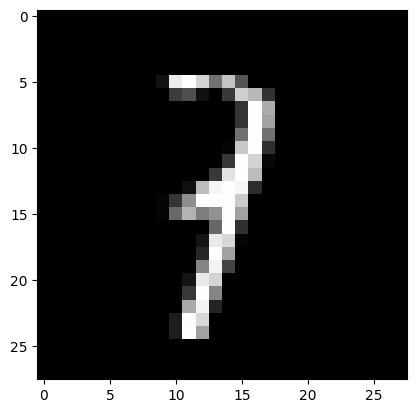

----------------------------------------------------------------
True value :  7
Predicted value :  9


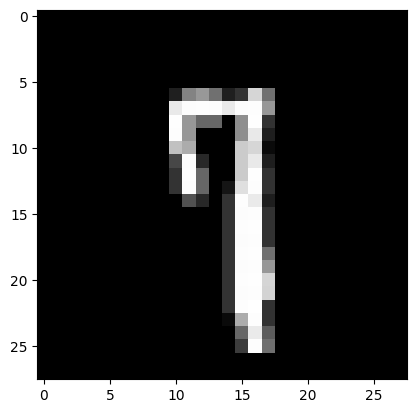

----------------------------------------------------------------
True value :  8
Predicted value :  7


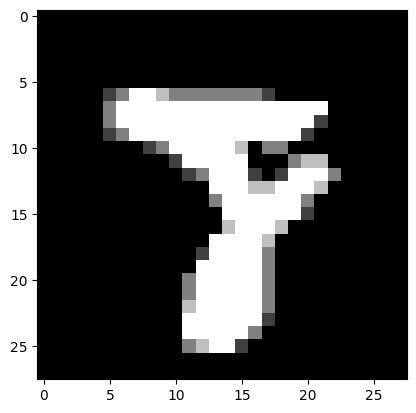

----------------------------------------------------------------
True value :  9
Predicted value :  3


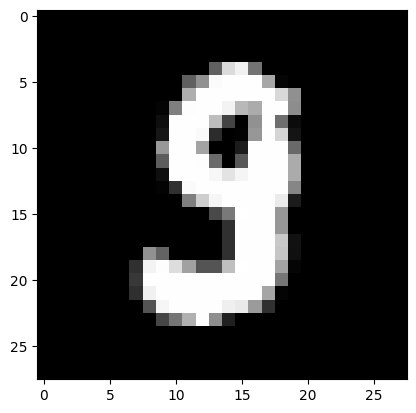

----------------------------------------------------------------
True value :  9
Predicted value :  3


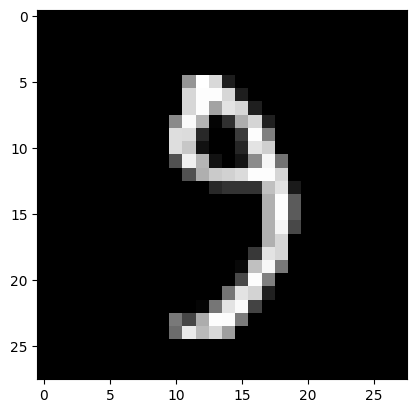

----------------------------------------------------------------
True value :  3
Predicted value :  7


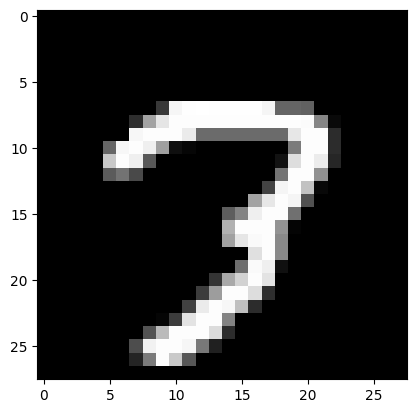

----------------------------------------------------------------
True value :  9
Predicted value :  3


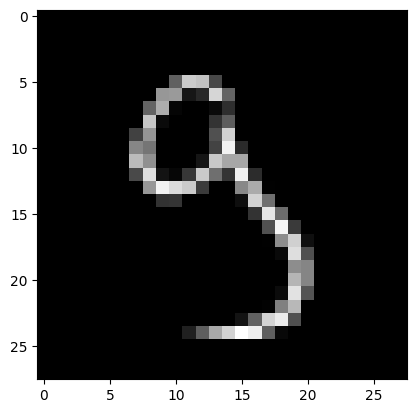

----------------------------------------------------------------
True value :  8
Predicted value :  0


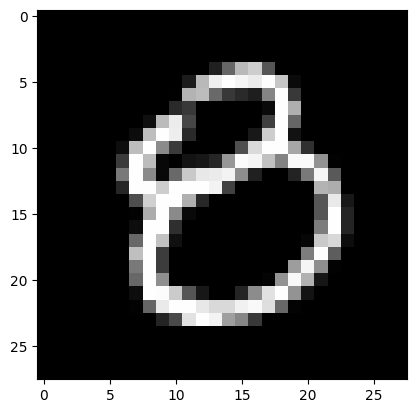

----------------------------------------------------------------
True value :  7
Predicted value :  9


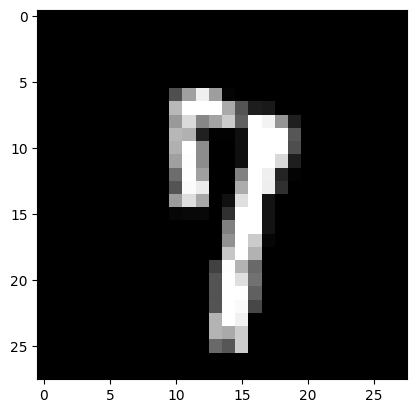

----------------------------------------------------------------
True value :  5
Predicted value :  3


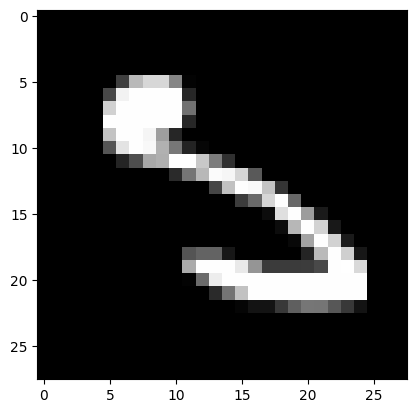

----------------------------------------------------------------
True value :  7
Predicted value :  1


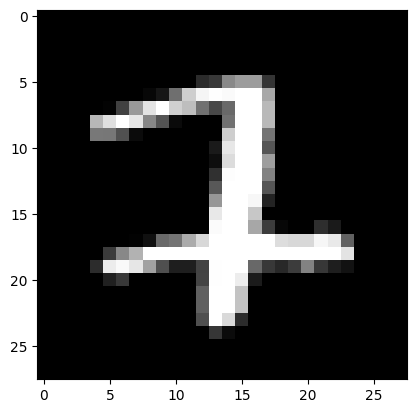

----------------------------------------------------------------
True value :  8
Predicted value :  4


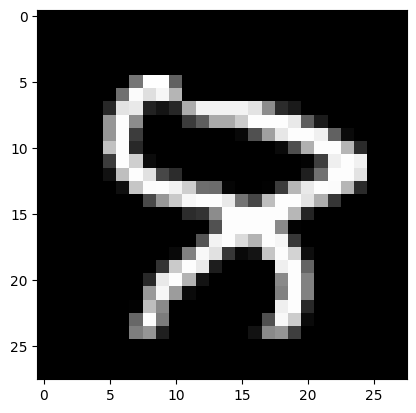

----------------------------------------------------------------
True value :  2
Predicted value :  7


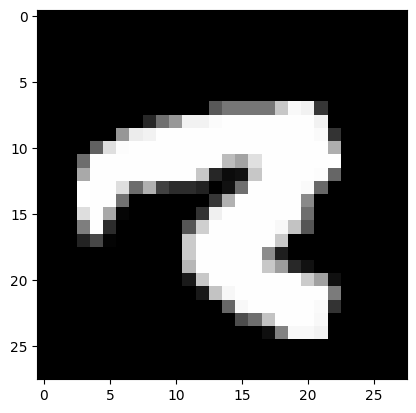

----------------------------------------------------------------
True value :  8
Predicted value :  3


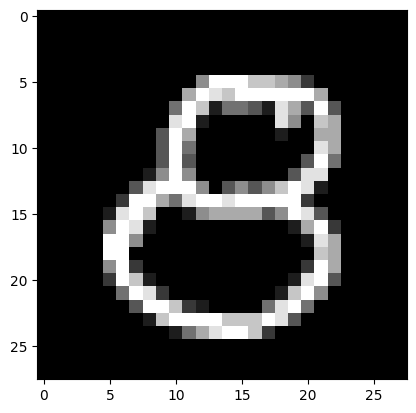

----------------------------------------------------------------
True value :  8
Predicted value :  4


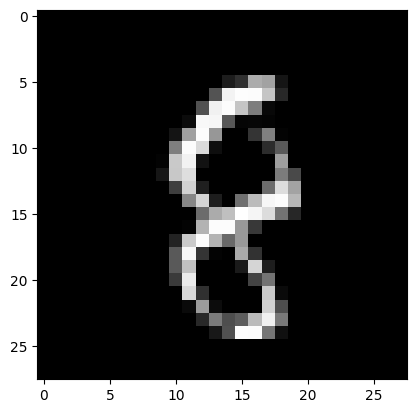

----------------------------------------------------------------
True value :  4
Predicted value :  1


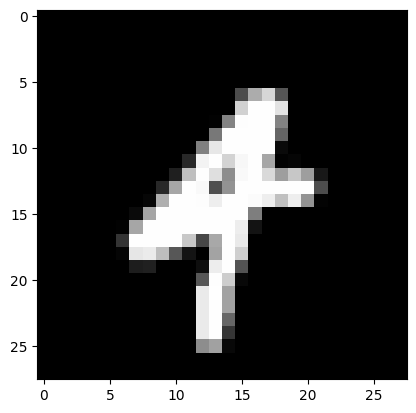

----------------------------------------------------------------
True value :  8
Predicted value :  3


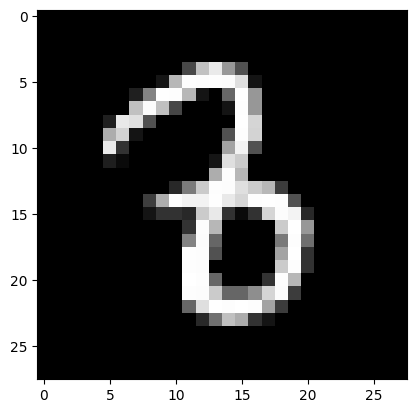

----------------------------------------------------------------
True value :  9
Predicted value :  4


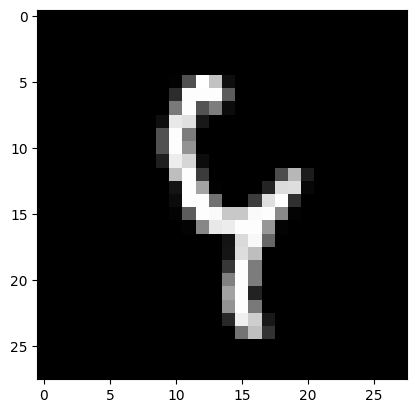

----------------------------------------------------------------
True value :  8
Predicted value :  2


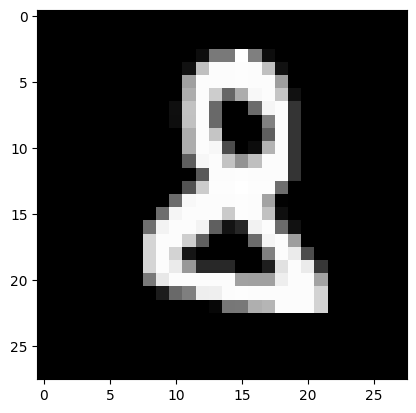

----------------------------------------------------------------
True value :  5
Predicted value :  3


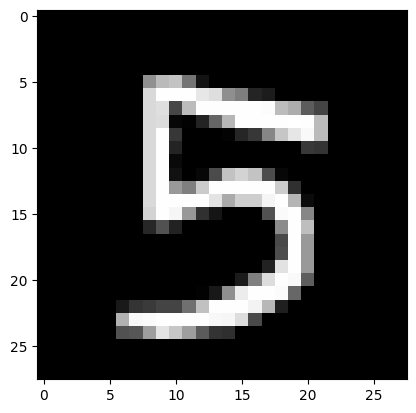

----------------------------------------------------------------
True value :  2
Predicted value :  0


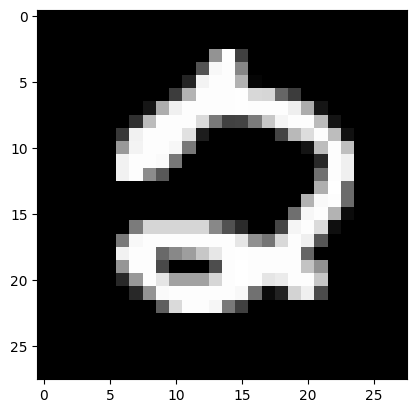

----------------------------------------------------------------
True value :  4
Predicted value :  9


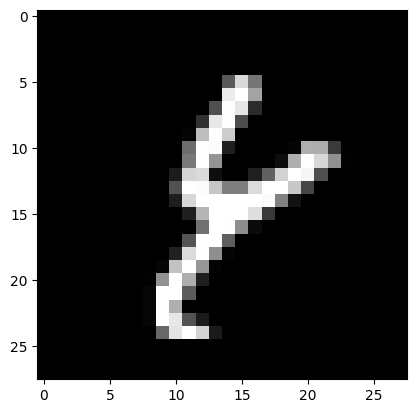

----------------------------------------------------------------
True value :  2
Predicted value :  7


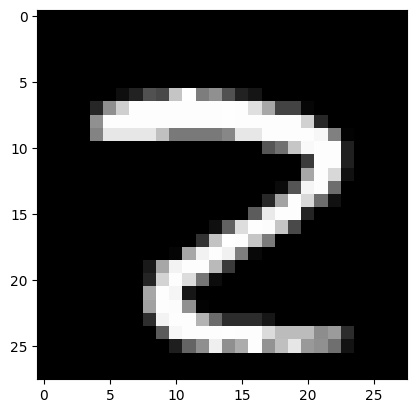

----------------------------------------------------------------
True value :  8
Predicted value :  4


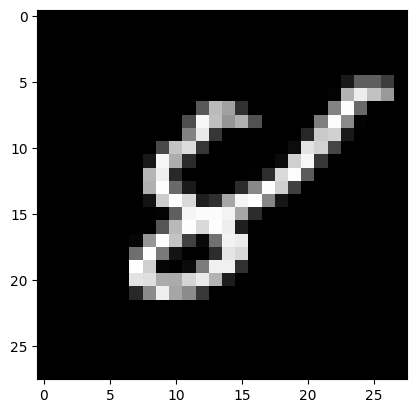

----------------------------------------------------------------
True value :  7
Predicted value :  1


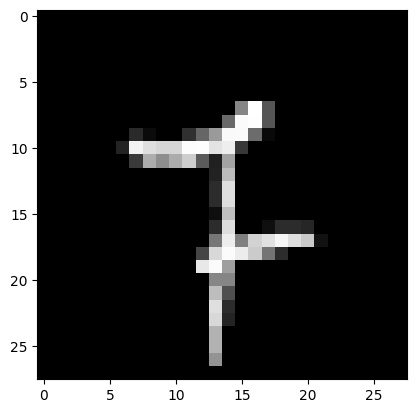

----------------------------------------------------------------
True value :  5
Predicted value :  0


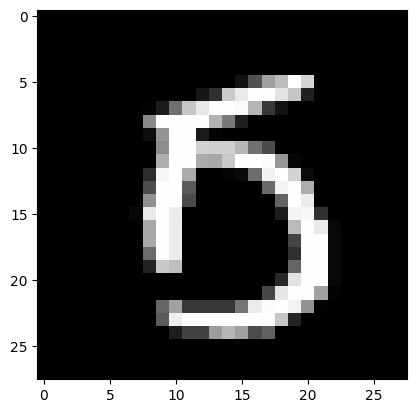

----------------------------------------------------------------
True value :  8
Predicted value :  0


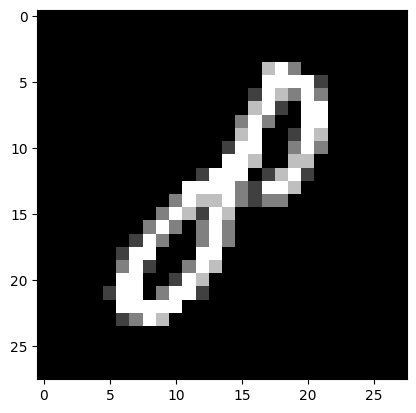

----------------------------------------------------------------
True value :  2
Predicted value :  0


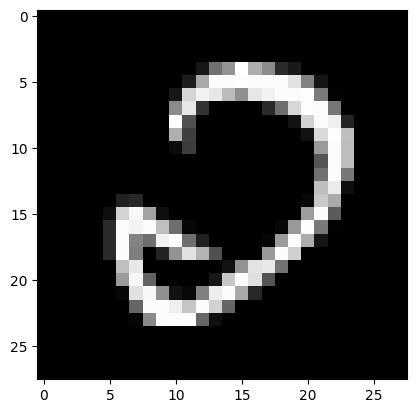

----------------------------------------------------------------
True value :  3
Predicted value :  8


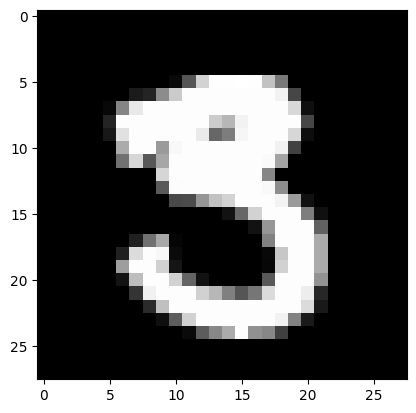

----------------------------------------------------------------
True value :  3
Predicted value :  4


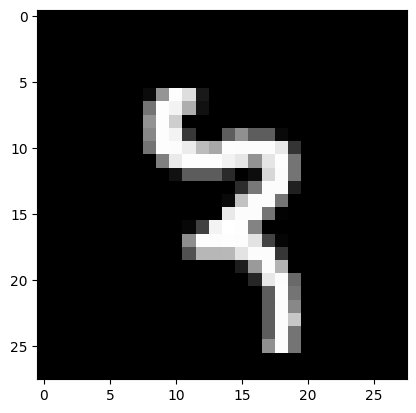

----------------------------------------------------------------
True value :  6
Predicted value :  0


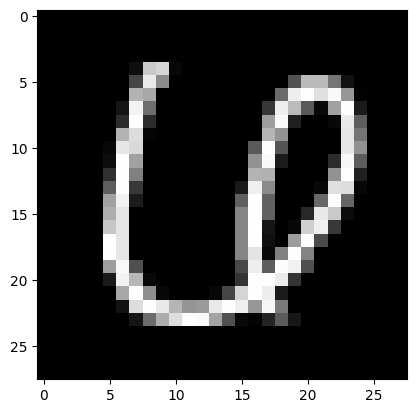

----------------------------------------------------------------
True value :  9
Predicted value :  2


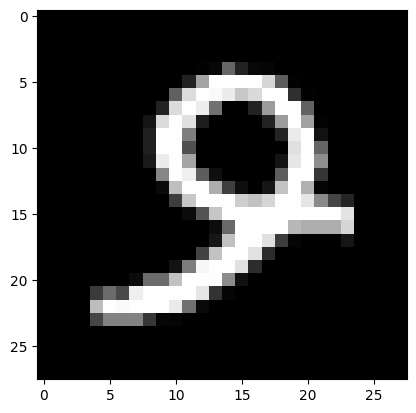

----------------------------------------------------------------
True value :  4
Predicted value :  9


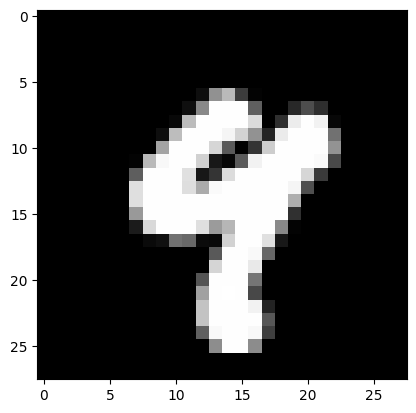

----------------------------------------------------------------
True value :  6
Predicted value :  1


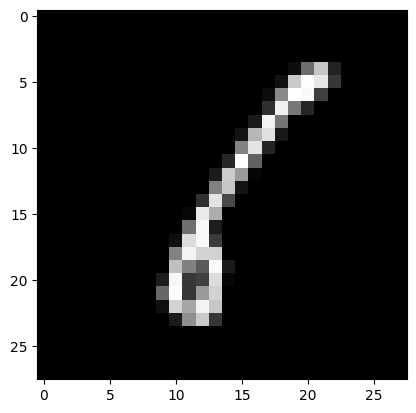

----------------------------------------------------------------
True value :  8
Predicted value :  2


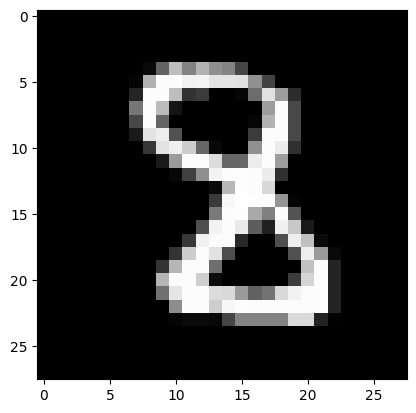

----------------------------------------------------------------
True value :  8
Predicted value :  3


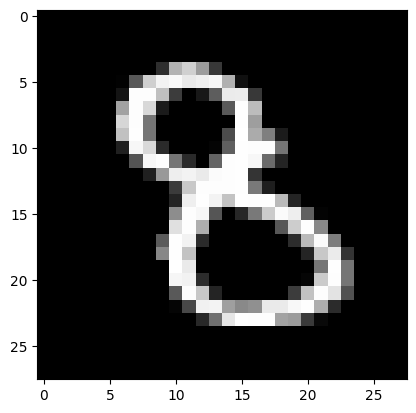

----------------------------------------------------------------
True value :  1
Predicted value :  2


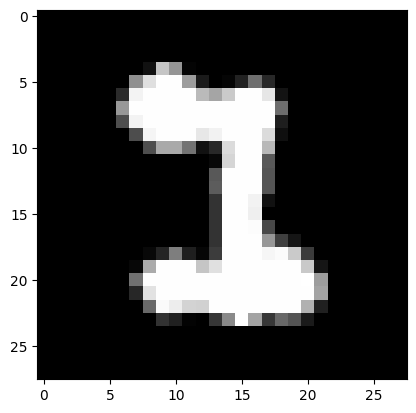

----------------------------------------------------------------
True value :  5
Predicted value :  6


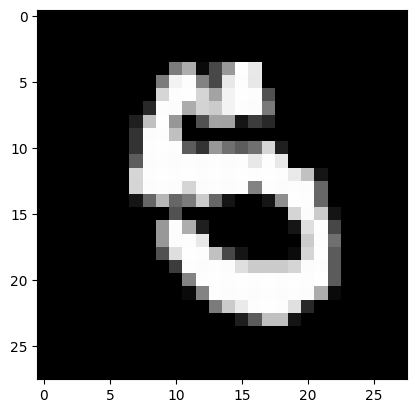

----------------------------------------------------------------
True value :  5
Predicted value :  8


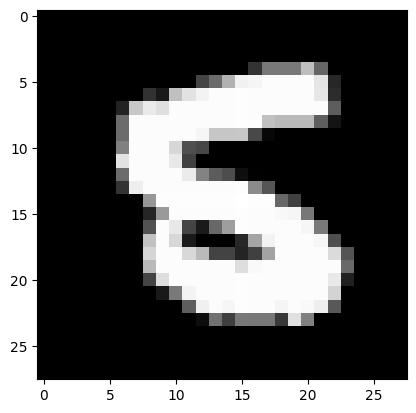

----------------------------------------------------------------
True value :  9
Predicted value :  6


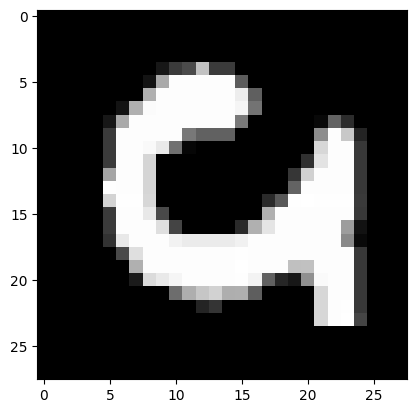

----------------------------------------------------------------
True value :  8
Predicted value :  0


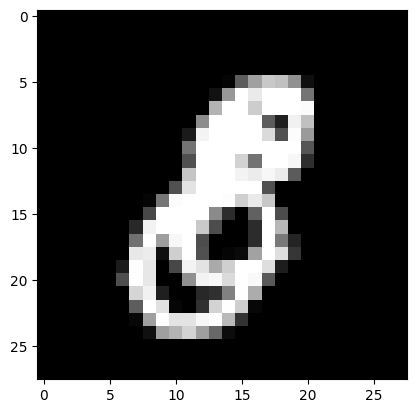

----------------------------------------------------------------
True value :  2
Predicted value :  7


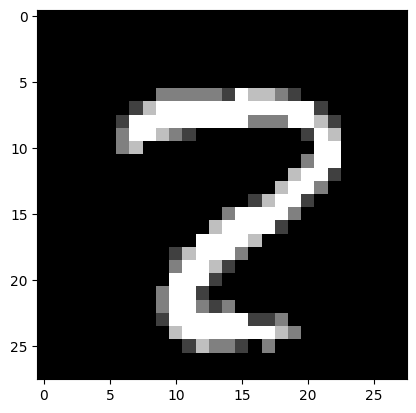

----------------------------------------------------------------
True value :  8
Predicted value :  5


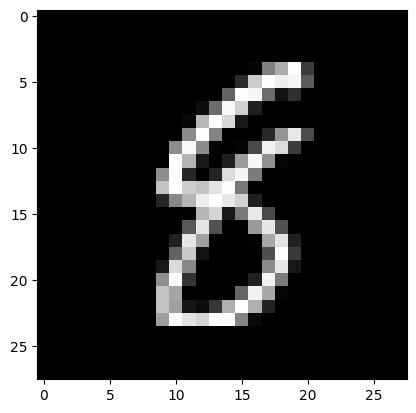

----------------------------------------------------------------
True value :  5
Predicted value :  8


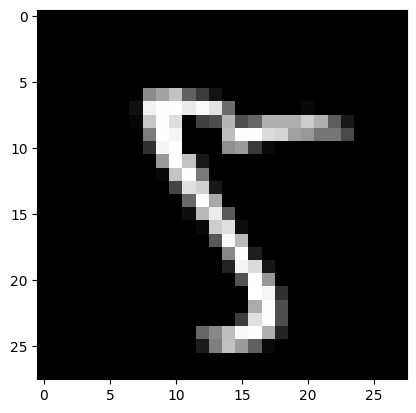

----------------------------------------------------------------
True value :  3
Predicted value :  5


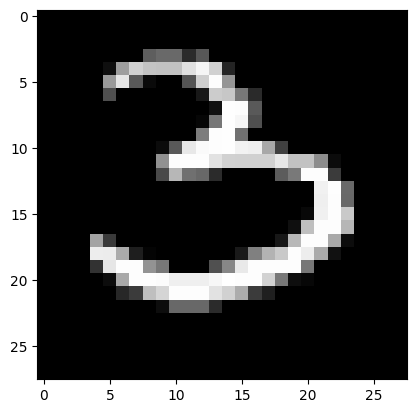

----------------------------------------------------------------
True value :  9
Predicted value :  1


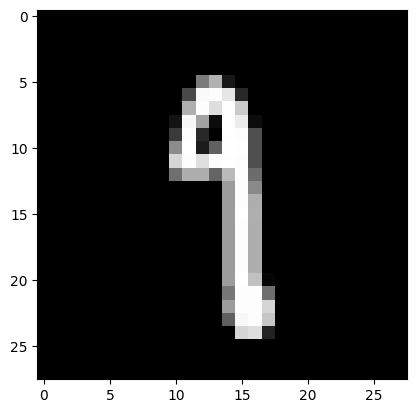

----------------------------------------------------------------
True value :  8
Predicted value :  3


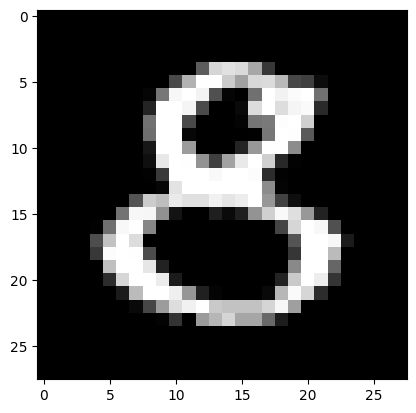

----------------------------------------------------------------
True value :  9
Predicted value :  1


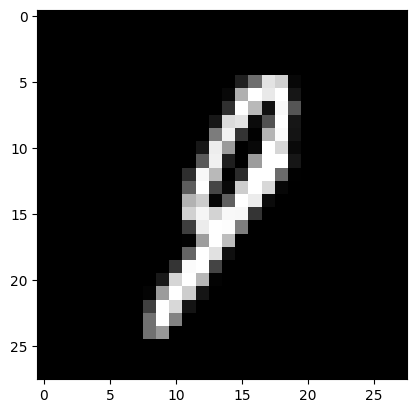

----------------------------------------------------------------
True value :  6
Predicted value :  4


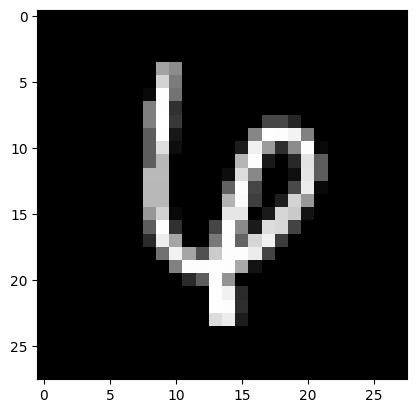

----------------------------------------------------------------
True value :  9
Predicted value :  4


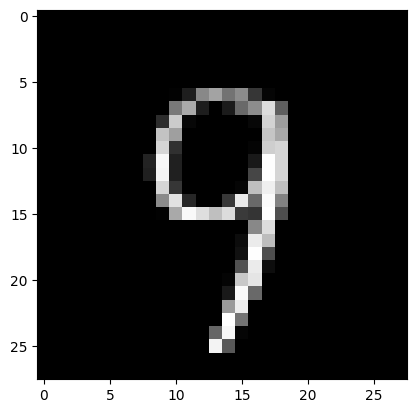

----------------------------------------------------------------
True value :  8
Predicted value :  3


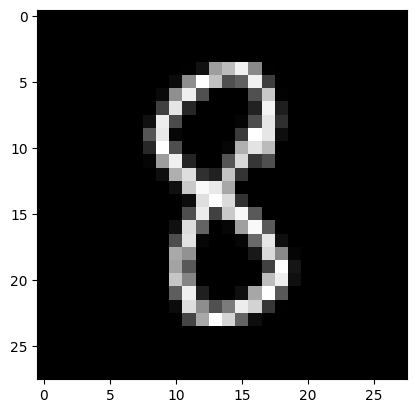

----------------------------------------------------------------
True value :  2
Predicted value :  1


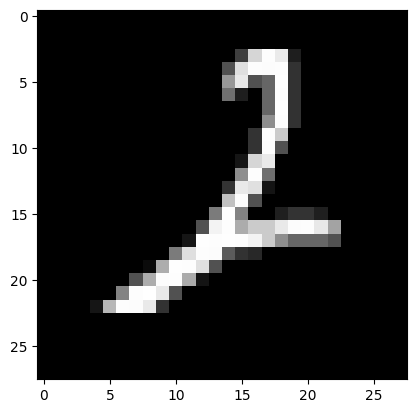

----------------------------------------------------------------
True value :  6
Predicted value :  5


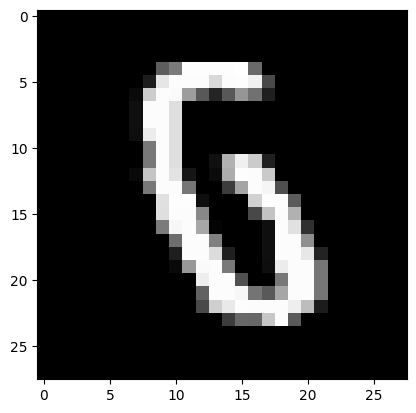

----------------------------------------------------------------
True value :  2
Predicted value :  7


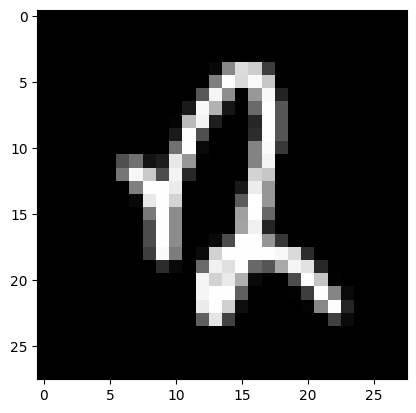

----------------------------------------------------------------
True value :  3
Predicted value :  1


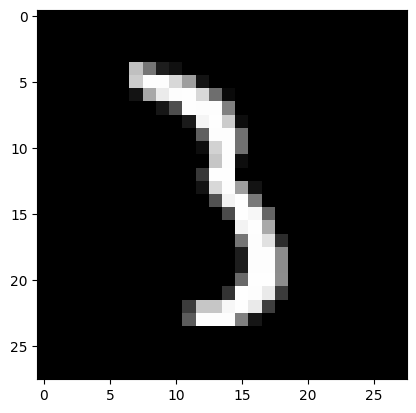

----------------------------------------------------------------
True value :  7
Predicted value :  1


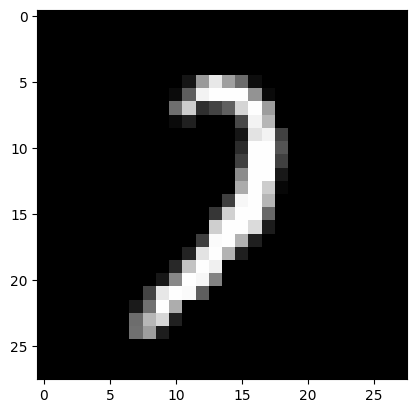

----------------------------------------------------------------
True value :  9
Predicted value :  7


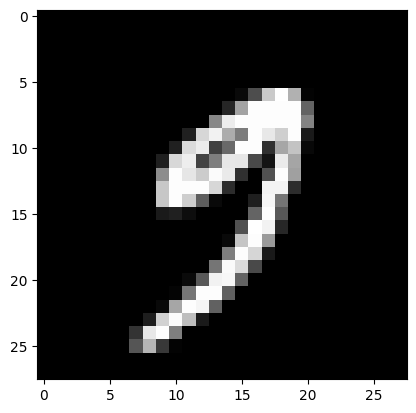

----------------------------------------------------------------
True value :  5
Predicted value :  3


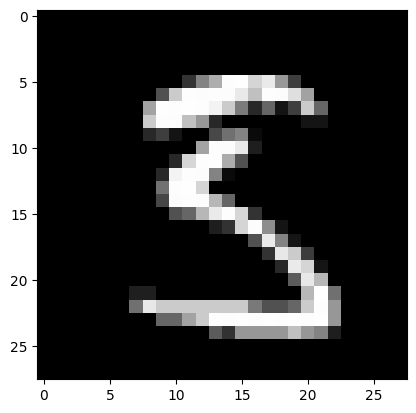

----------------------------------------------------------------
True value :  7
Predicted value :  1


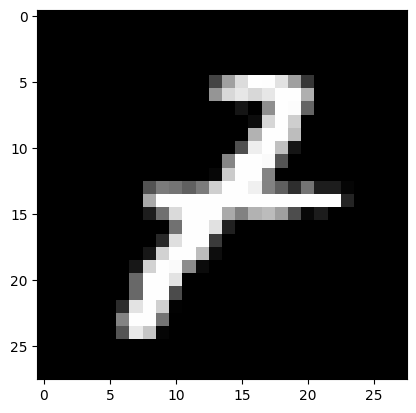

----------------------------------------------------------------
True value :  9
Predicted value :  0


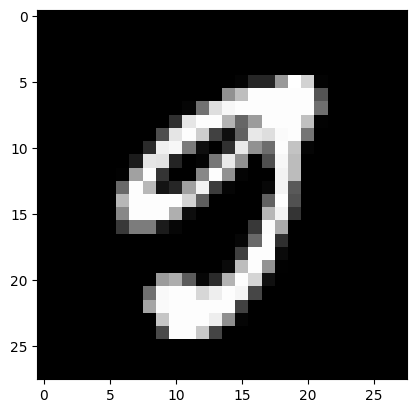

----------------------------------------------------------------
True value :  6
Predicted value :  1


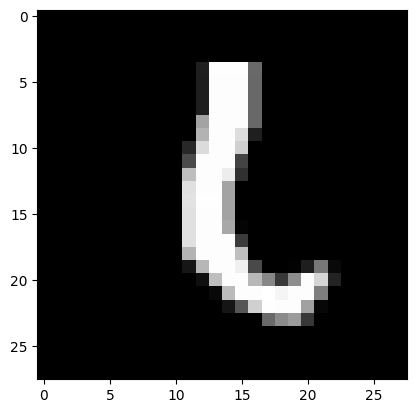

----------------------------------------------------------------
True value :  6
Predicted value :  5


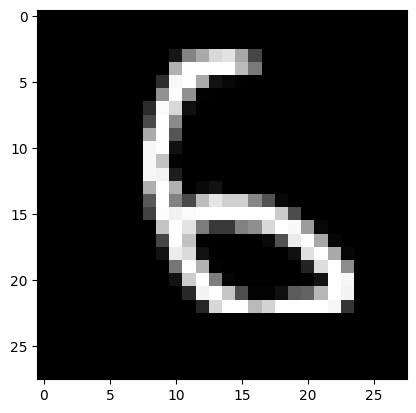

----------------------------------------------------------------
True value :  8
Predicted value :  5


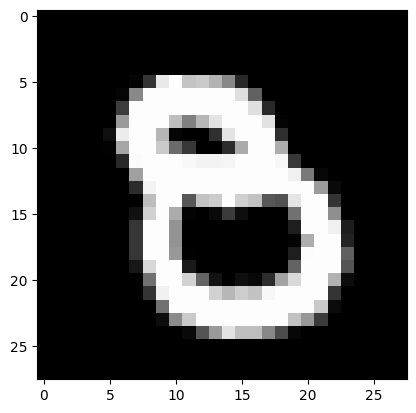

----------------------------------------------------------------
True value :  4
Predicted value :  9


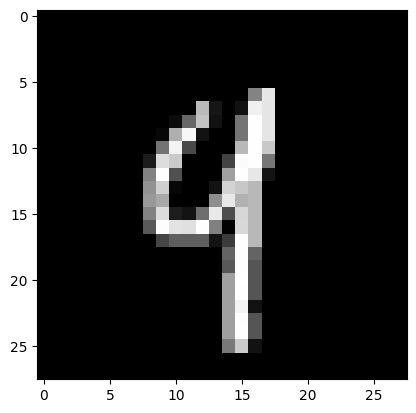

----------------------------------------------------------------
True value :  5
Predicted value :  0


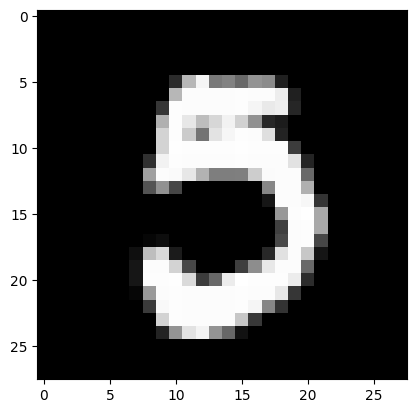

----------------------------------------------------------------
True value :  8
Predicted value :  0


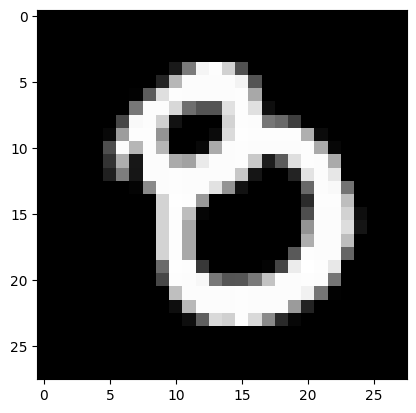

----------------------------------------------------------------
True value :  4
Predicted value :  9


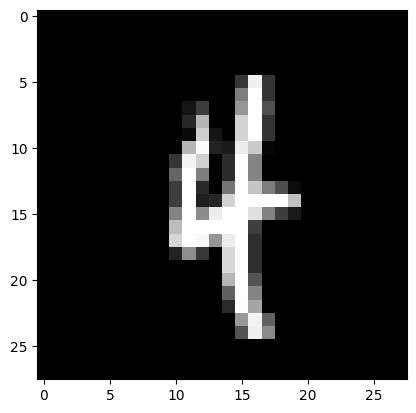

----------------------------------------------------------------
True value :  3
Predicted value :  2


In [ ]:
test_y_predicted = best_model.predict(test_x)

for i in range(len(test_y)):
    if test_y[i] != test_y_predicted[i]:
        print("True value : ", test_y[i])
        print("Predicted value : ", test_y_predicted[i])
        plt.imshow(test_x.iloc[i, :].values.reshape((28, 28)), cmap="gray")
        plt.show()
        print("----------------------------------------------------------------")